### Distribution of customers of their first visited section versus following sections

In [1]:
%load_ext pycodestyle_magic

In [2]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('data/data_clean.csv', index_col=0, sep=',', header=0)

# cast timestamp to datetime format
df.timestamp = pd.to_datetime(df.timestamp)
df.head()

,timestamp,location,customer_id,date
0,2019-09-02 07:03:00,dairy,2019-09-02_1,2019-09-02
1,2019-09-02 07:03:00,dairy,2019-09-02_2,2019-09-02
2,2019-09-02 07:04:00,dairy,2019-09-02_3,2019-09-02
3,2019-09-02 07:04:00,dairy,2019-09-02_4,2019-09-02
4,2019-09-02 07:04:00,spices,2019-09-02_5,2019-09-02


In [4]:
df['cust_reoccured'] = df.duplicated('customer_id')

In [5]:
first_sections = df[df['cust_reoccured'] == False]
follow_sections = df[df['cust_reoccured'] == True]
# remove checkout rows
follow_sections = follow_sections[follow_sections.location != 'checkout']

In [6]:
first_grouped = first_sections.groupby('location')[['customer_id']].count()
first_grouped.rename(columns={'customer_id':'customer count'}, inplace=True)
following_grouped = follow_sections.groupby('location')[['customer_id']].count()
following_grouped.rename(columns={'customer_id':'customer count'}, inplace=True)

In [7]:
# Percentual shares of customers in first sections
first_grouped['share'] = first_grouped['customer count']/first_grouped['customer count'].sum()
first_grouped

,customer count,share
location,,
dairy,2141,0.287576
drinks,1143,0.153526
fruit,2810,0.377435
spices,1351,0.181464


In [8]:
following_grouped['share'] = following_grouped['customer count']/following_grouped['customer count'].sum()
following_grouped

,customer count,share
location,,
dairy,2538,0.253420
drinks,2762,0.275786
fruit,2312,0.230854
spices,2403,0.239940


In [33]:
# Create an array with the colors you want to use
mycolors = ["darkgrey", "blue", "darkorange", "green"]# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

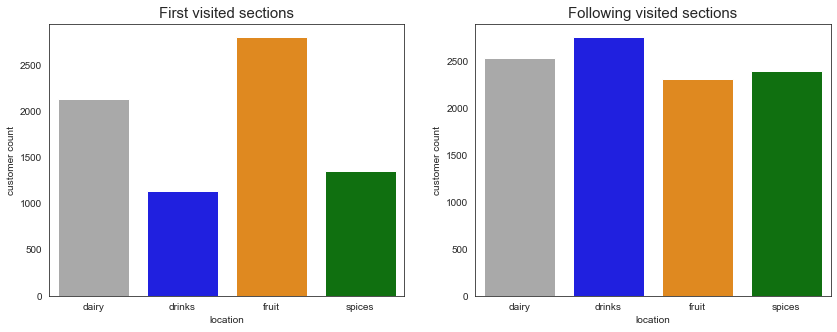

In [34]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))
fig1 = sns.barplot(x ='location', y='customer count', 
                   data=first_grouped.reset_index(), palette = mycolors ,
                   ax=ax[0]).set_title('First visited sections', fontsize=15)
fig2 = sns.barplot(x ='location', y='customer count', 
                   data=following_grouped.reset_index(), palette = mycolors,
                   ax=ax[1]).set_title('Following visited sections', fontsize=15)

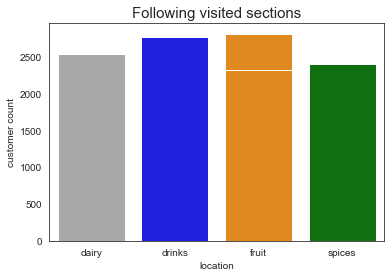

In [36]:
# export images
#%matplotlib agg
sns.set_style("white")
mycolors = ["darkgrey", "blue", "darkorange", "green"]# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
fig1 = sns.barplot(x ='location', y='customer count', palette = mycolors,
                   data=first_grouped.reset_index()).set_title('First visited sections', fontsize=15)
fig1.figure.savefig('plots/first_visited_section_shares.png', dpi=300)



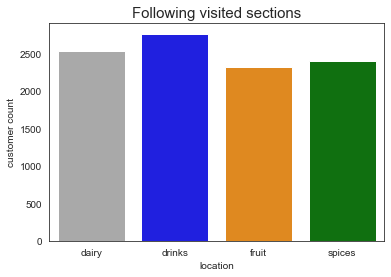

In [37]:
fig2 = sns.barplot(x ='location', y='customer count', palette = mycolors,
                   data=following_grouped.reset_index()).set_title('Following visited sections', fontsize=15)
fig2.figure.savefig('plots/follow_visited_section_shares.png', dpi=400)

In [84]:
### Distribution of customers at checkout during one day
df_checkout_mon = df[(df['location'] == 'checkout') & (df['date'] == '2019-09-04')]
df_checkout_mon_plot = df_checkout_mon.groupby('timestamp')[['customer_id']].count().resample(rule='30MIN').sum().reset_index()
df_checkout_mon_plot.tail()

,timestamp,customer_id
25,2019-09-04 19:30:00,96
26,2019-09-04 20:00:00,44
27,2019-09-04 20:30:00,41
28,2019-09-04 21:00:00,30
29,2019-09-04 21:30:00,36


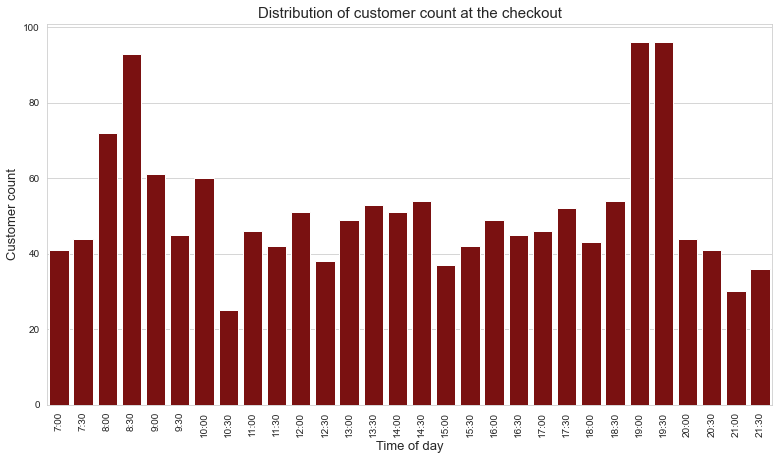

In [85]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (13, 7)

fig_checkout = sns.barplot(x ='timestamp', y='customer_id', color = 'darkred',
                   data=df_checkout_mon_plot).set_title('Following visited sections', fontsize=15)
# Custom X axis
xtick_pos = list(range(0,30))
labels = ['7:00', '7:30', '8:00', '8:30', '9:00', '9:30', '10:00', '10:30',
         '11:00', '11:30', '12:00', '12:30', '13:00', '13:30', '14:00', '14:30',
         '15:00', '15:30', '16:00', '16:30', '17:00', '17:30', '18:00', '18:30',
         '19:00', '19:30', '20:00', '20:30', '21:00', '21:30']

plt.xticks(xtick_pos, labels, fontweight='normal',rotation=90)
plt.xlabel("Time of day", fontsize=13)
plt.ylabel('Customer count', fontsize=13)

plt.xlim(xmin=-0.5, xmax=29.5)
plt.title('Distribution of customer count at the checkout', fontsize=15)
plt.savefig(f'plots/dist_checkout_wed.png', dpi=300)
